In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [235]:
df=pd.read_csv("sector1.csv")
df.head()

,date,population
0,14-01-2022,49.0
1,01-02-2022,51.0
2,15-04-2022,57.0
3,19-05-2022,55.0
4,27-06-2022,53.0


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        16 non-null     object 
 1   population  16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


In [237]:
df.isnull().sum()

date          1
population    1
dtype: int64

In [238]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-238-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [239]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [242]:
 from prophet import Prophet

In [243]:
population=df.groupby('date')['population'].sum().reset_index()

In [244]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [245]:
model=Prophet(interval_width=0.95)

In [246]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/_1xlu8lm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/g8bhmh86.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77037', 'data', 'file=/tmp/tmpqki2d_87/_1xlu8lm.json', 'init=/tmp/tmpqki2d_87/g8bhmh86.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelpqjf6qp5/prophet_model-20230421063940.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:39:40 - cmdstanpy - INFO - Chain [1] start processing
IN

In [247]:
future_dates=model.make_future_dataframe(periods=30)

In [248]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-02  58.961261   31.679574   84.900394    58.961261    58.961261   
1  2022-01-14  59.016111   31.141676   87.003963    59.016111    59.016111   
2  2022-03-07  59.253795   32.791390   86.826981    59.253795    59.253795   
3  2022-04-15  59.432058   33.620061   84.258655    59.432058    59.432058   
4  2022-05-08  59.537187   33.739098   88.402542    59.537187    59.537187   
5  2022-05-19  59.587467   33.639480   89.270918    59.587467    59.587467   
6  2022-06-27  59.765730   33.066510   88.200026    59.765730    59.765730   
7  2022-07-29  59.911997   32.912316   88.750920    59.911997    59.911997   
8  2022-09-17  60.140539   34.196653   86.325284    60.140539    60.140539   
9  2022-10-21  60.295948   33.438895   88.678039    60.295948    60.295948   
10 2022-11-21  60.437644   33.023081   86.068171    60.437644    60.437644   
11 2023-01-21  60.716465   33.274941   87.205198    60.716465   

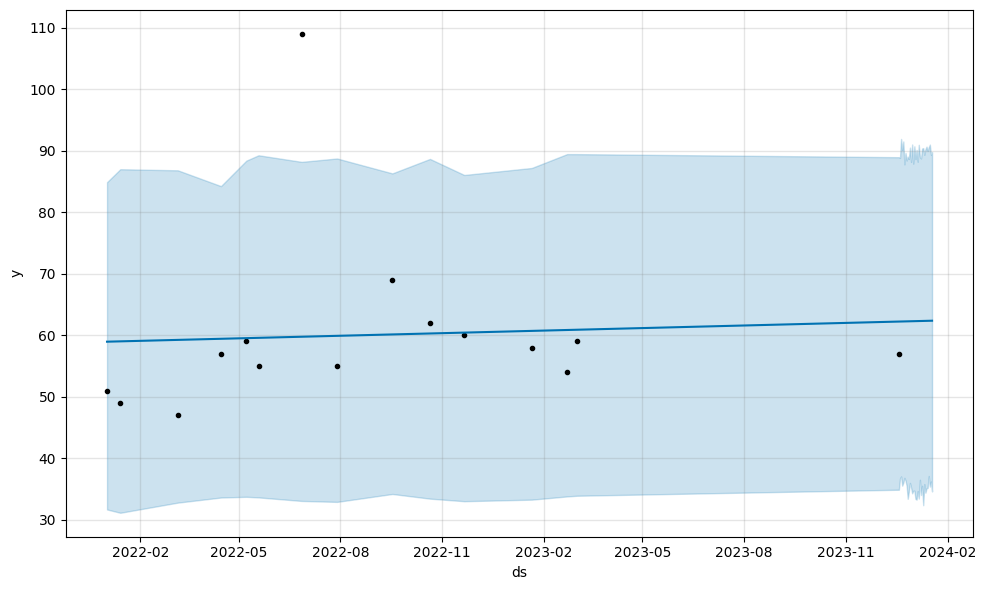

In [249]:
model.plot(forecast)
print(forecast)

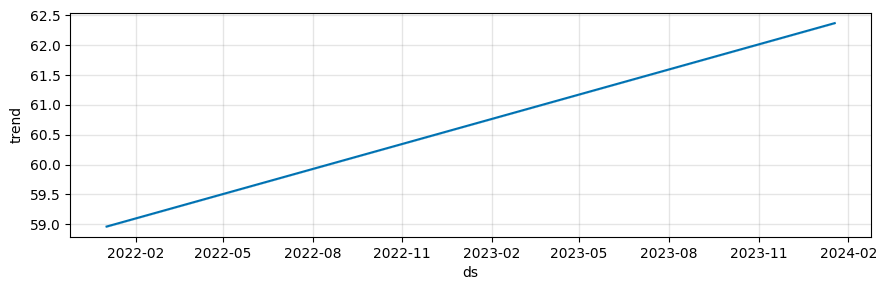

In [250]:
component=model.plot_components(forecast)

In [251]:
 model1=Prophet(interval_width=0.95)

In [252]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/93caqkb7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/eolod1y_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29298', 'data', 'file=/tmp/tmpqki2d_87/93caqkb7.json', 'init=/tmp/tmpqki2d_87/eolod1y_.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modeljm3dlchl/prophet_model-20230421063958.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:39:58 - cmdstanpy - INFO - Chain [1] start processing
IN

In [253]:
future_dates=model1.make_future_dataframe(periods=10)

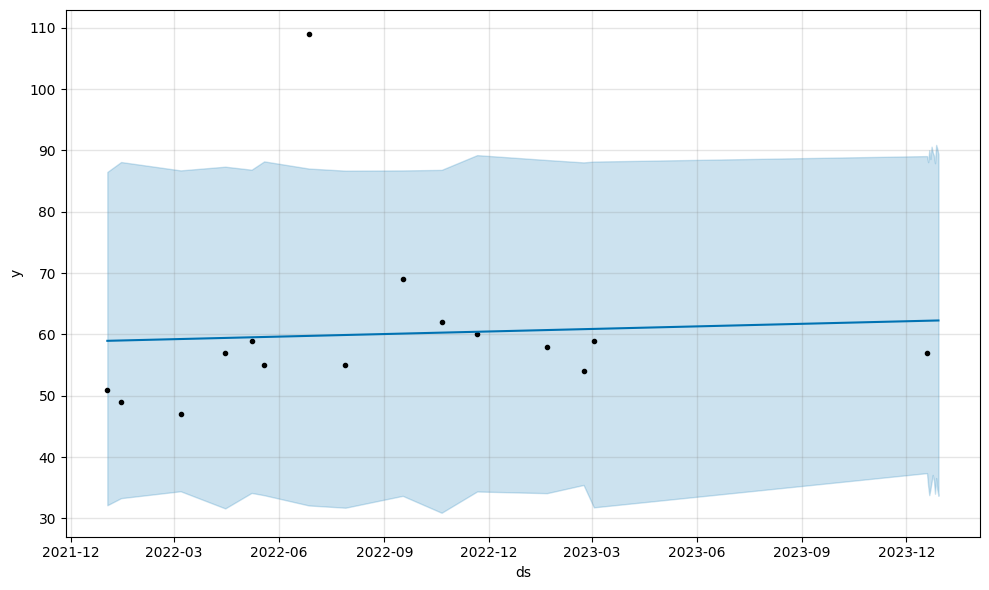

In [254]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-02  58.961261   32.149862   86.494197    58.961261    58.961261   
1  2022-01-14  59.016111   33.305773   88.114670    59.016111    59.016111   
2  2022-03-07  59.253795   34.431587   86.751110    59.253795    59.253795   
3  2022-04-15  59.432058   31.630932   87.355074    59.432058    59.432058   
4  2022-05-08  59.537187   34.157121   86.862228    59.537187    59.537187   
5  2022-05-19  59.587467   33.783827   88.218676    59.587467    59.587467   
6  2022-06-27  59.765730   32.115663   87.051448    59.765730    59.765730   
7  2022-07-29  59.911997   31.746719   86.706108    59.911997    59.911997   
8  2022-09-17  60.140539   33.679855   86.743237    60.140539    60.140539   
9  2022-10-21  60.295948   30.921973   86.835636    60.295948    60.295948   
10 2022-11-21  60.437644   34.394026   89.238986    60.437644    60.437644   
11 2023-01-21  60.716465   34.117683   88.444646    60.716465   

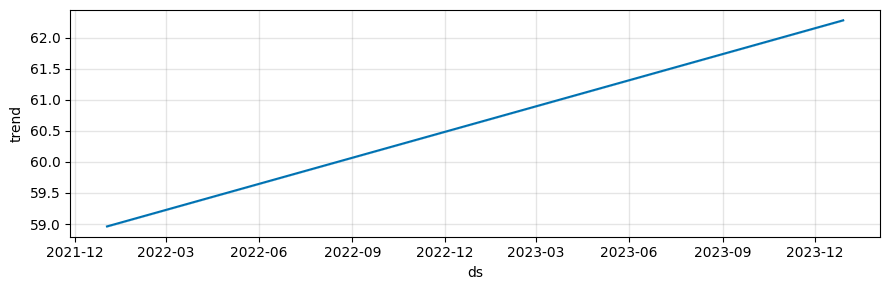

In [255]:
week=model1.plot_components(forecasting)
print(forecasting)